<a href="https://colab.research.google.com/github/TurboPug2101/Data-Science-Projects/blob/main/Terrorism_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
%matplotlib inline


In [5]:
data= pd.read_csv("/content/drive/MyDrive/terrorism.csv",encoding="latin1")
df=pd.DataFrame(data)
df.head()

<ipython-input-5-316e9663b439>:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data= pd.read_csv("/content/drive/MyDrive/terrorism.csv",encoding="latin1")


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(56), int64(21), object(58)
memory usage: 187.1+ MB


In [7]:
df.shape

(181691, 135)

In [10]:
for i in df.columns:
  print(i,end=", ")

eventid, iyear, imonth, iday, approxdate, extended, resolution, country, country_txt, region, region_txt, provstate, city, latitude, longitude, specificity, vicinity, location, summary, crit1, crit2, crit3, doubtterr, alternative, alternative_txt, multiple, success, suicide, attacktype1, attacktype1_txt, attacktype2, attacktype2_txt, attacktype3, attacktype3_txt, targtype1, targtype1_txt, targsubtype1, targsubtype1_txt, corp1, target1, natlty1, natlty1_txt, targtype2, targtype2_txt, targsubtype2, targsubtype2_txt, corp2, target2, natlty2, natlty2_txt, targtype3, targtype3_txt, targsubtype3, targsubtype3_txt, corp3, target3, natlty3, natlty3_txt, gname, gsubname, gname2, gsubname2, gname3, gsubname3, motive, guncertain1, guncertain2, guncertain3, individual, nperps, nperpcap, claimed, claimmode, claimmode_txt, claim2, claimmode2, claimmode2_txt, claim3, claimmode3, claimmode3_txt, compclaim, weaptype1, weaptype1_txt, weapsubtype1, weapsubtype1_txt, weaptype2, weaptype2_txt, weapsubtype2

# **Cleaning the data**
Getting only important columns

In [12]:
df=df[["iyear","imonth","iday","country_txt", "region_txt","provstate", "city", "latitude", "longitude","location", "summary","attacktype1_txt","targtype1_txt","gname","motive","weaptype1_txt","nkill","nwound","addnotes"]]

In [13]:
df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [14]:
df.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country",
                   "region_txt":"Region","provstate":"Province/State","city":"City",
                   "latitude":"Latitude","longitude":"Longitude","location":"Location",
                   "summary":"Summary","attacktype1_txt":"Attack Type","targtype1_txt":"Target Type",
                   "gname":"Group Name","motive":"Motive","weaptype1_txt":"Weapon Type",
                   "nkill":"Killed","nwound":"Wounded","addnotes":"Add Notes"},inplace=True)

<ipython-input-14-a989c62acfc6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country",


In [15]:
df.head()


,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded,Add Notes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [16]:
df.isnull().sum()

Year                   0
Month                  0
Day                    0
Country                0
Region                 0
Province/State       421
City                 434
Latitude            4556
Longitude           4557
Location          126196
Summary            66129
Attack Type            0
Target Type            0
Group Name             0
Motive            131130
Weapon Type            0
Killed             10313
Wounded            16311
Add Notes         153402
dtype: int64

In [18]:
df["Killed"]=df["Killed"].fillna(0)
df["Wounded"]=df["Wounded"].fillna(0)
df["Casualty"]=df["Killed"]+df["Wounded"]

<ipython-input-18-a027e751f953>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Killed"]=df["Killed"].fillna(0)
<ipython-input-18-a027e751f953>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Wounded"]=df["Wounded"].fillna(0)
<ipython-input-18-a027e751f953>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [19]:
df.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded,Casualty
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


Year Wise Attacks

In [22]:
attacks=df["Year"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"Year","Year":"Attacks"}).set_index("Year")
attacks.head()

,Attacks
Year,
1970,651
1971,471
1972,568
1973,473
1974,581


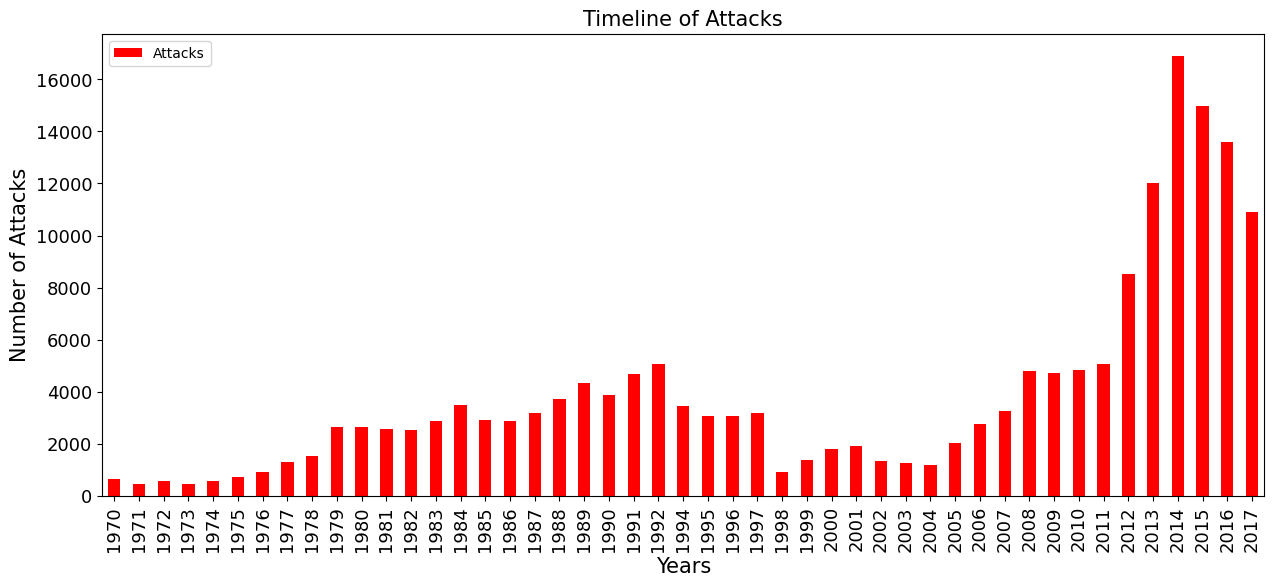

In [25]:
attacks.plot(kind="bar",color="red",figsize=(15,6),fontsize=13)
plt.title("Timeline of Attacks",fontsize=15)
plt.xlabel("Years",fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

In [28]:
kills=df[["Year","Killed"]].groupby("Year").sum()
kills.head()

,Killed
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


In [30]:
wounds=df[["Year","Wounded"]].groupby("Year").sum()
wounds.head()

,Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


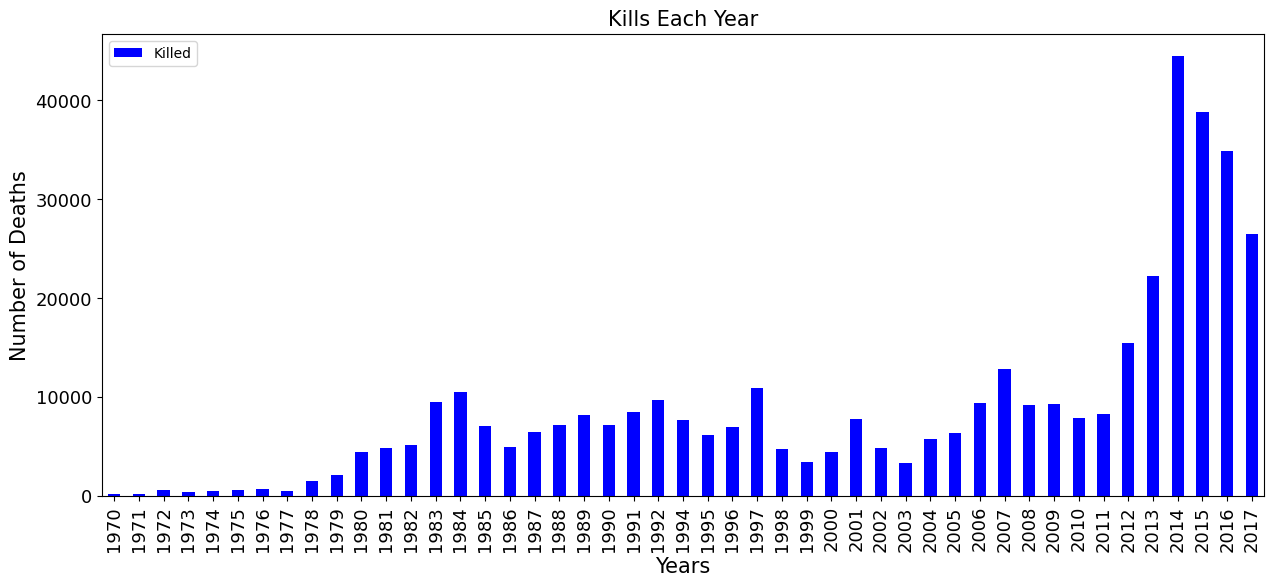

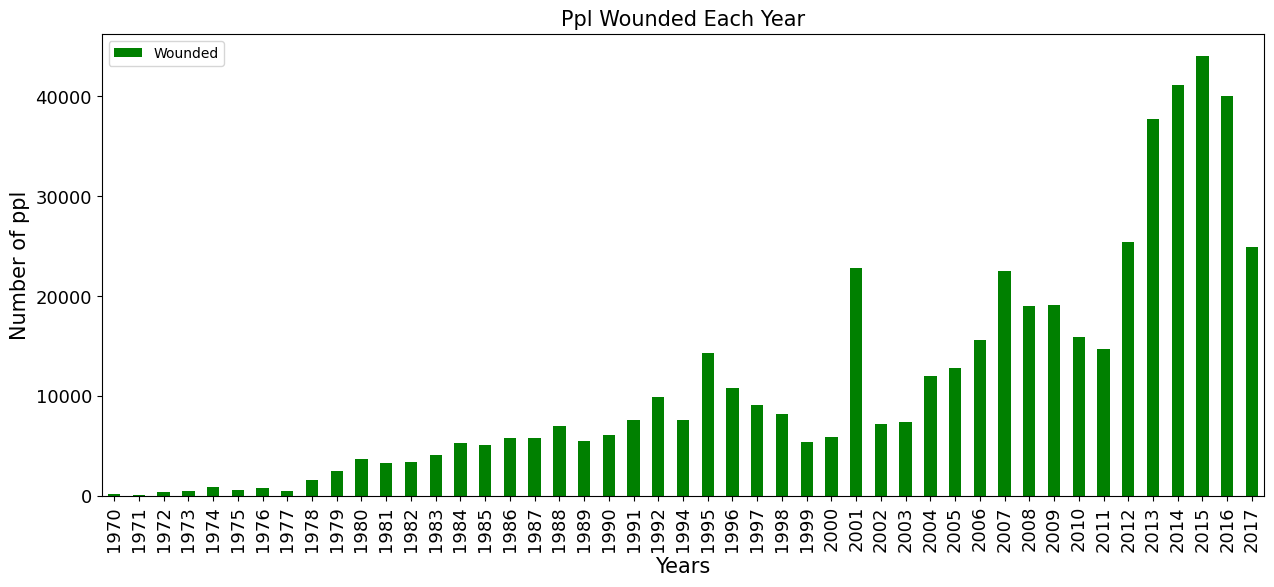

In [35]:
kills.plot(kind="bar",color="blue",figsize=(15,6),fontsize=13)
plt.title("Kills Each Year",fontsize=15)
plt.xlabel("Years",fontsize=15)
plt.ylabel("Number of Deaths",fontsize=15)
plt.show()

wounds.plot(kind="bar",color="green",figsize=(15,6),fontsize=13)
plt.title("Ppl Wounded Each Year",fontsize=15)
plt.xlabel("Years",fontsize=15)
plt.ylabel("Number of ppl",fontsize=15)
plt.show()

#Region Wise Attacks
 

In [37]:
reg=pd.crosstab(df.Year,df.Region)
reg.head()

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


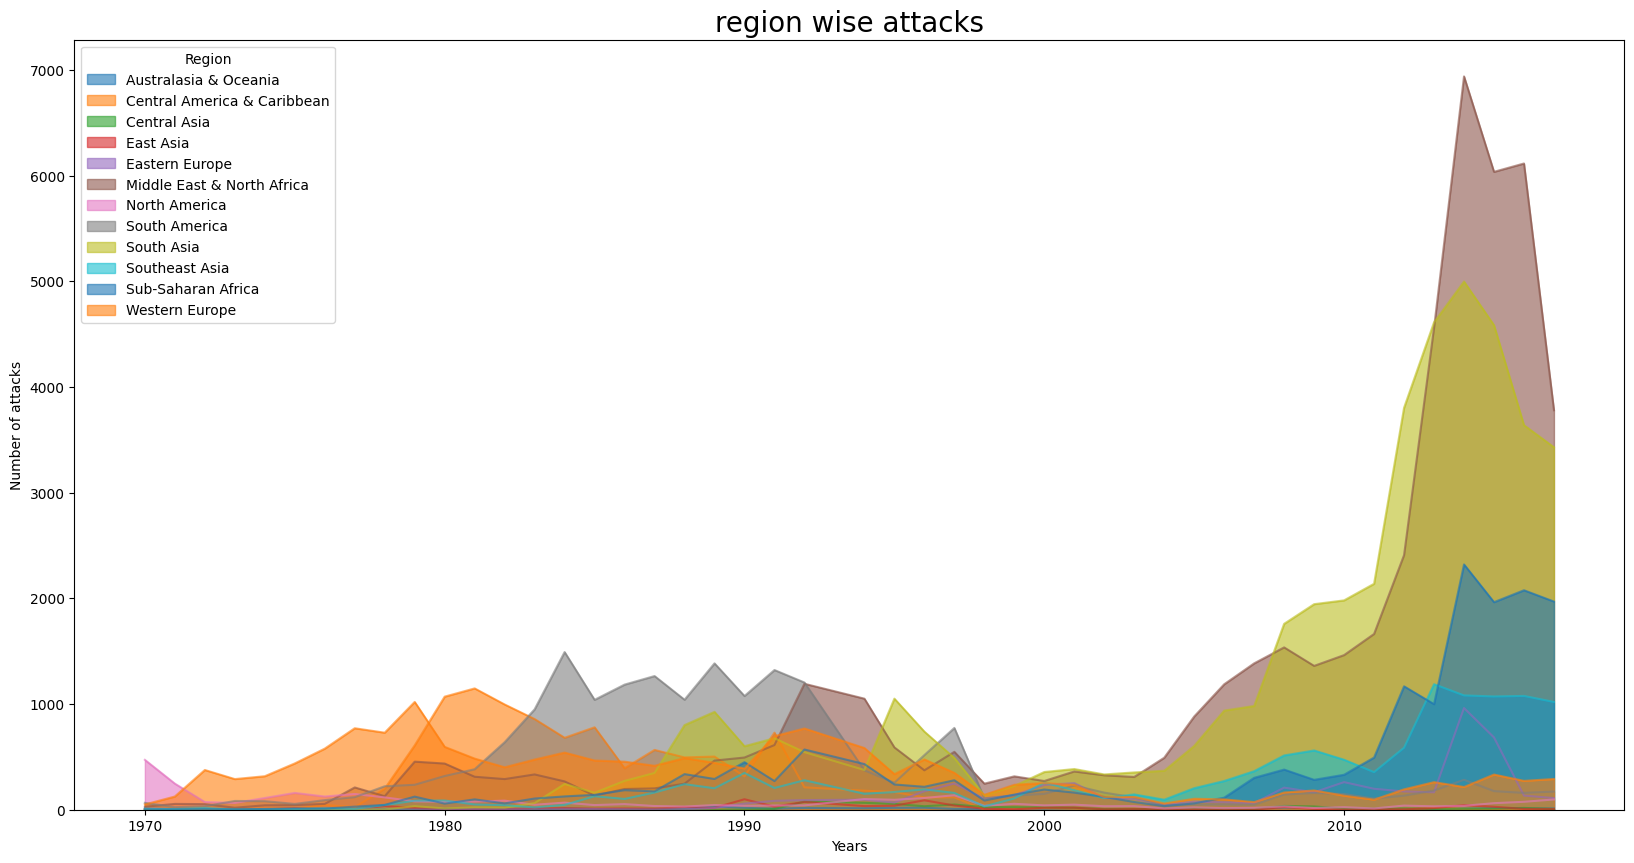

In [42]:
reg.plot(kind="area",stacked=False,alpha=0.6,figsize=(20,10))
plt.title("region wise attacks",fontsize=20)
plt.xlabel("Years")
plt.ylabel("Number of attacks")
plt.show()

In [49]:
country=df[["Country","Killed"]].groupby("Country").sum()
country.head()

,Killed
Country,
Afghanistan,39384.0
Albania,42.0
Algeria,11066.0
Andorra,0.0
Angola,3043.0


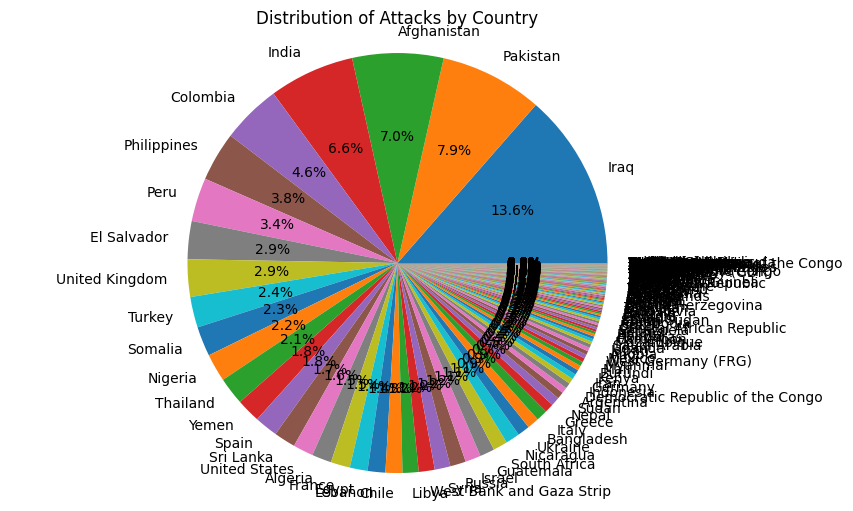

In [50]:
country_counts = df["Country"].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 6))  # Set the figure size (optional)
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Attacks by Country')
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart

# Display the chart
plt.show()

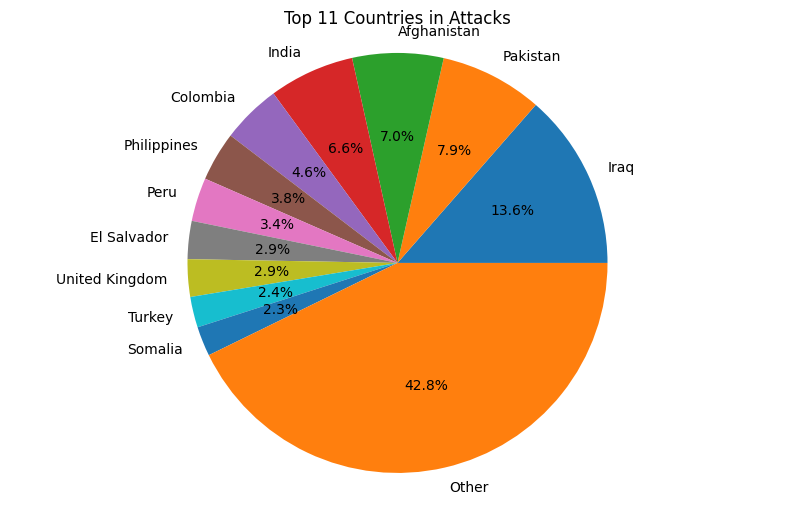

In [53]:
import matplotlib.pyplot as plt

# Assuming your DataFrame column with country names is called "Country"
top_n = 11  # Set the number of top countries you want to include in the pie chart

# Calculate the counts of each country
country_counts = df["Country"].value_counts()

# Get the top N countries and their counts
top_countries = country_counts.head(top_n)

# Create a new DataFrame for the top N countries and "Other" category
top_countries_df = pd.DataFrame(top_countries)
top_countries_df.loc["Other"] = country_counts.sum() - top_countries.sum()

# Plotting the pie chart
plt.figure(figsize=(10, 6))  # Set the figure size (optional)
plt.pie(top_countries_df["Country"], labels=top_countries_df.index, autopct='%1.1f%%')
plt.title(f'Top {top_n} Countries in Attacks')
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart

# Display the chart
plt.show()


In [55]:
cww=df[["Country","Wounded"]].groupby("Country").sum().sort_values(by="Wounded",ascending=False)
cww.head(10)

,Wounded
Country,
Iraq,134690.0
Afghanistan,44277.0
Pakistan,42038.0
India,28980.0
United States,20702.0
Sri Lanka,15561.0
Syria,14109.0
Philippines,13367.0
Lebanon,10904.0


In [63]:
cww.sort_values(by="Country", ascending=False)
top_wounded=cww.head(10)

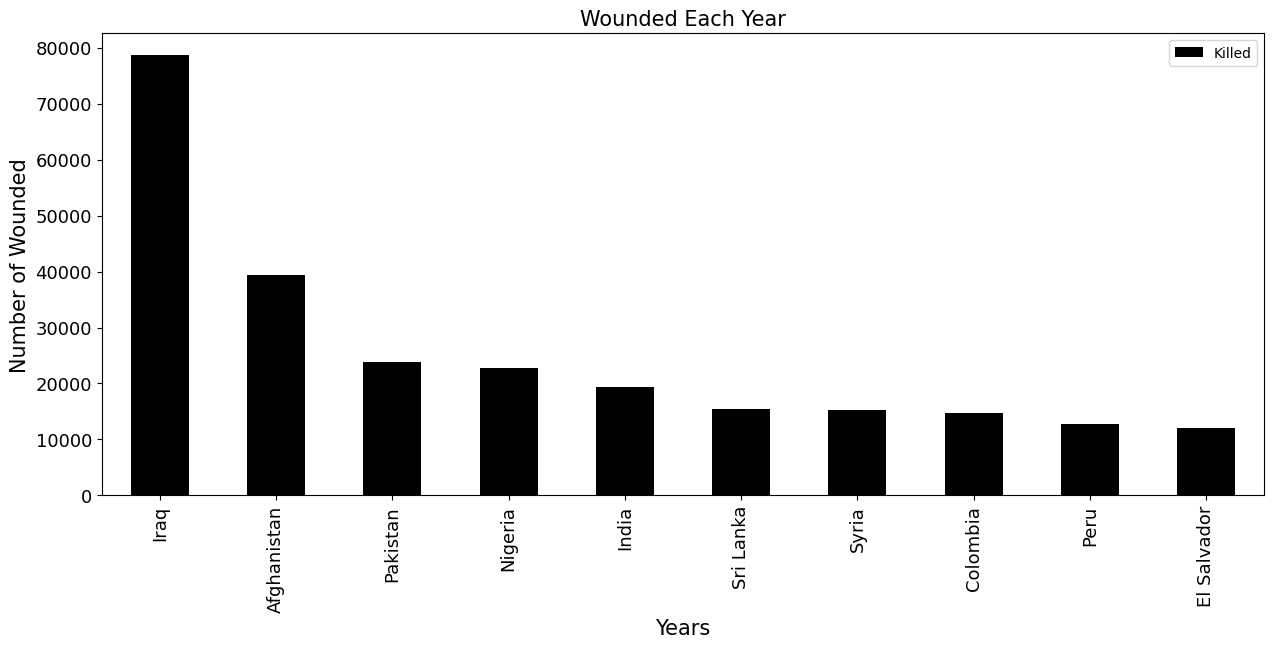

In [70]:
top_wounded.plot(kind="bar",color="black",figsize=(15,6),fontsize=13)
plt.title("Wounded Each Year",fontsize=15)
plt.xlabel("Years",fontsize=15)
plt.ylabel("Number of Wounded",fontsize=15)
plt.show()


In [57]:
cwk=df[["Country","Killed"]].groupby("Country").sum().sort_values(by="Killed",ascending=False)
cwk.head(10)

,Killed
Country,
Iraq,78589.0
Afghanistan,39384.0
Pakistan,23822.0
Nigeria,22682.0
India,19341.0
Sri Lanka,15530.0
Syria,15229.0
Colombia,14698.0
Peru,12771.0


In [66]:
cwk.sort_values(by="Country", ascending=False)
top_killed=cwk.head(10)

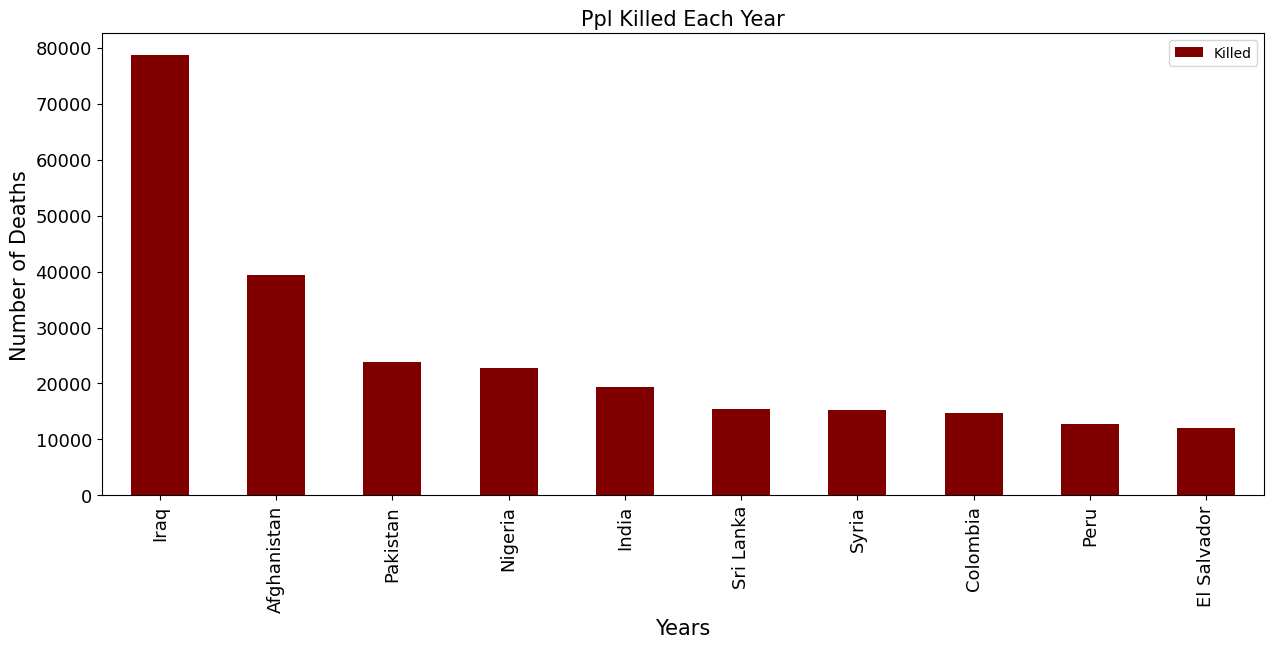

In [69]:
top_killed.plot(kind="bar",color="maroon",figsize=(15,6),fontsize=13)
plt.title("Ppl Killed Each Year",fontsize=15)
plt.xlabel("Years",fontsize=15)
plt.ylabel("Number of Deaths",fontsize=15)
plt.show()

#City Wise Analysis

In [71]:
city=df["City"].value_counts()[1:11]
city

Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Name: City, dtype: int64

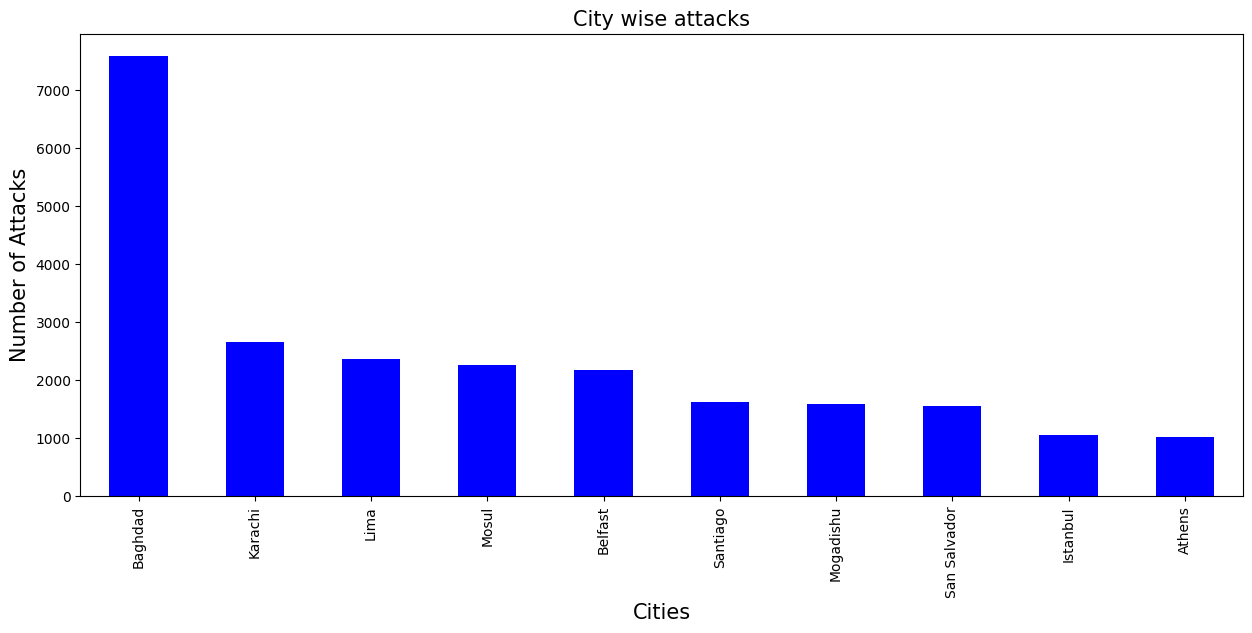

In [74]:
city.plot(kind="bar",color="blue",figsize=(15,6))
plt.title("City wise attacks",fontsize=15)
plt.xlabel("Cities",fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

#Terrorist Group Wise Attacks



In [75]:
grp=df["Group Name"].value_counts()[1:10]
grp

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: Group Name, dtype: int64

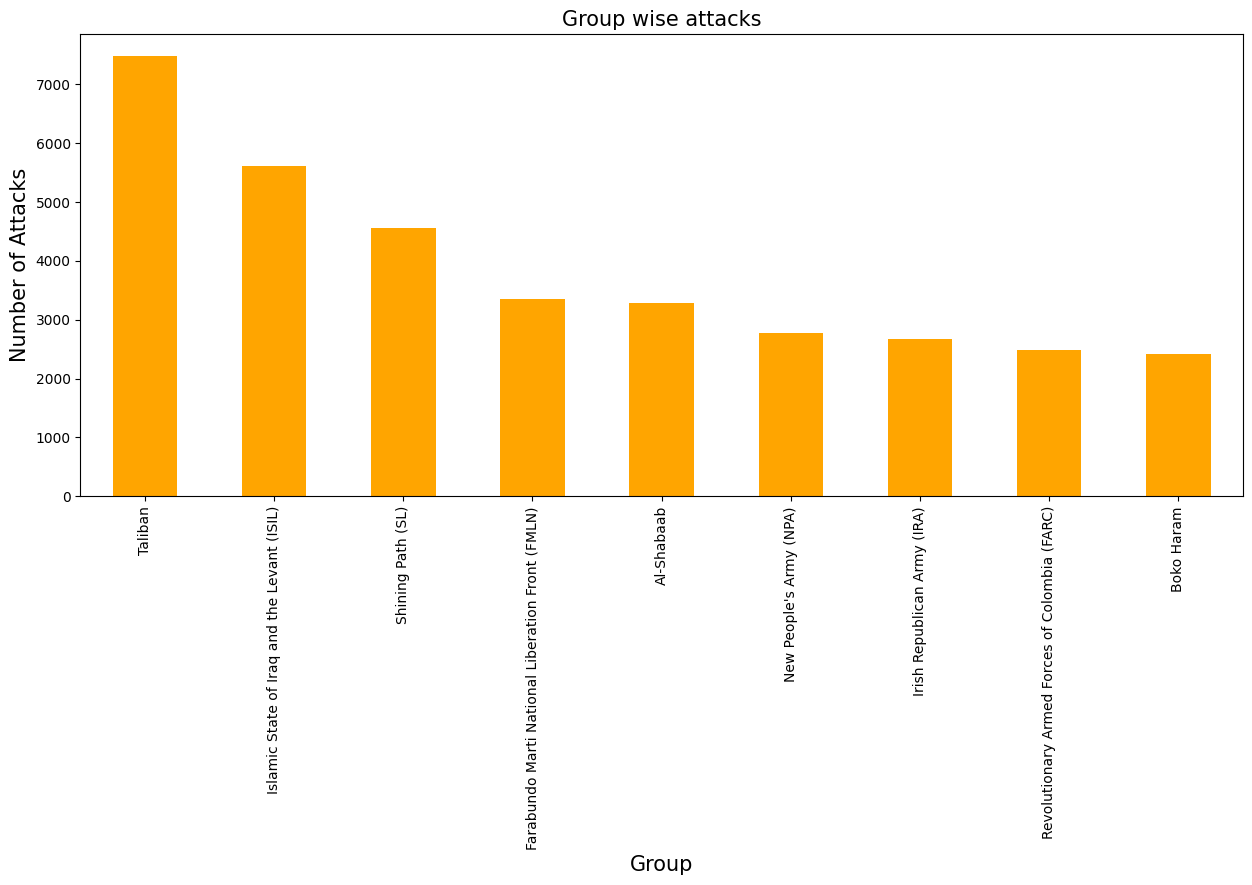

In [77]:
grp.plot(kind="bar",color="orange",figsize=(15,6))
plt.title("Group wise attacks",fontsize=15)
plt.xlabel("Group",fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

# Observations
Year wise Attacks :
  (i) Attacks
    (a) Most number of attacks: 16903 in 2014
    (b) Least number of attacks: 471 in 1971

 (iv) Wounded
    (a) Most number of people wounded: 44043 in 2015
    (b) Least number of people wounded: 82 in 1971

2. Region wise Attacks :
  (i) Attacks
    (a) Most number of attacks: 50474 in "Middle East & North Africa"
    (b) Least number of attacks: 282 in "Australasia & Oceania"

(iv) Wounded
    (a) Most number of people wounded: 214308 in "Middle East & North Africa"
    (b) Least number of people wounded: 260 in "Australasia & Oceania"